<a href="https://colab.research.google.com/github/Athrv10/Decision_Tree_Classifier_model_on_Bank_Marketing_PRODIGY_DS_03/blob/main/Decision_Tree_Classifier__Bank_Marketingipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Librabies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## **Loading Dataset**

In [ ]:
#reading the csv file using the pandas dataframe

df = pd.read_csv('bank.csv')

df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## **Performing EDA**

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
# checking if we have any columns that only have only one feature

for i in df.columns:
        print(i,len(df[i].unique()))

age 76
job 12
marital 3
education 4
default 2
balance 3805
housing 2
loan 2
contact 3
day 31
month 12
duration 1428
campaign 36
pdays 472
previous 34
poutcome 4
deposit 2


The above all columns has atleast 2 features

In [ ]:
#Exploring the categorical variables except the target label i.e deposit

for i in df.columns:
  if df[i].dtype == 'O' and i != 'deposit':
    print(i , len(df[i].unique()))
    print(df[i].unique())

cat_feature = [i for i in df.columns if df[i].dtype == 'O' and i != 'deposit']


job 12
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital 3
['married' 'single' 'divorced']
education 4
['secondary' 'tertiary' 'primary' 'unknown']
default 2
['no' 'yes']
housing 2
['yes' 'no']
loan 2
['no' 'yes']
contact 3
['unknown' 'cellular' 'telephone']
month 12
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome 4
['unknown' 'other' 'failure' 'success']


In [ ]:
cat_feature

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

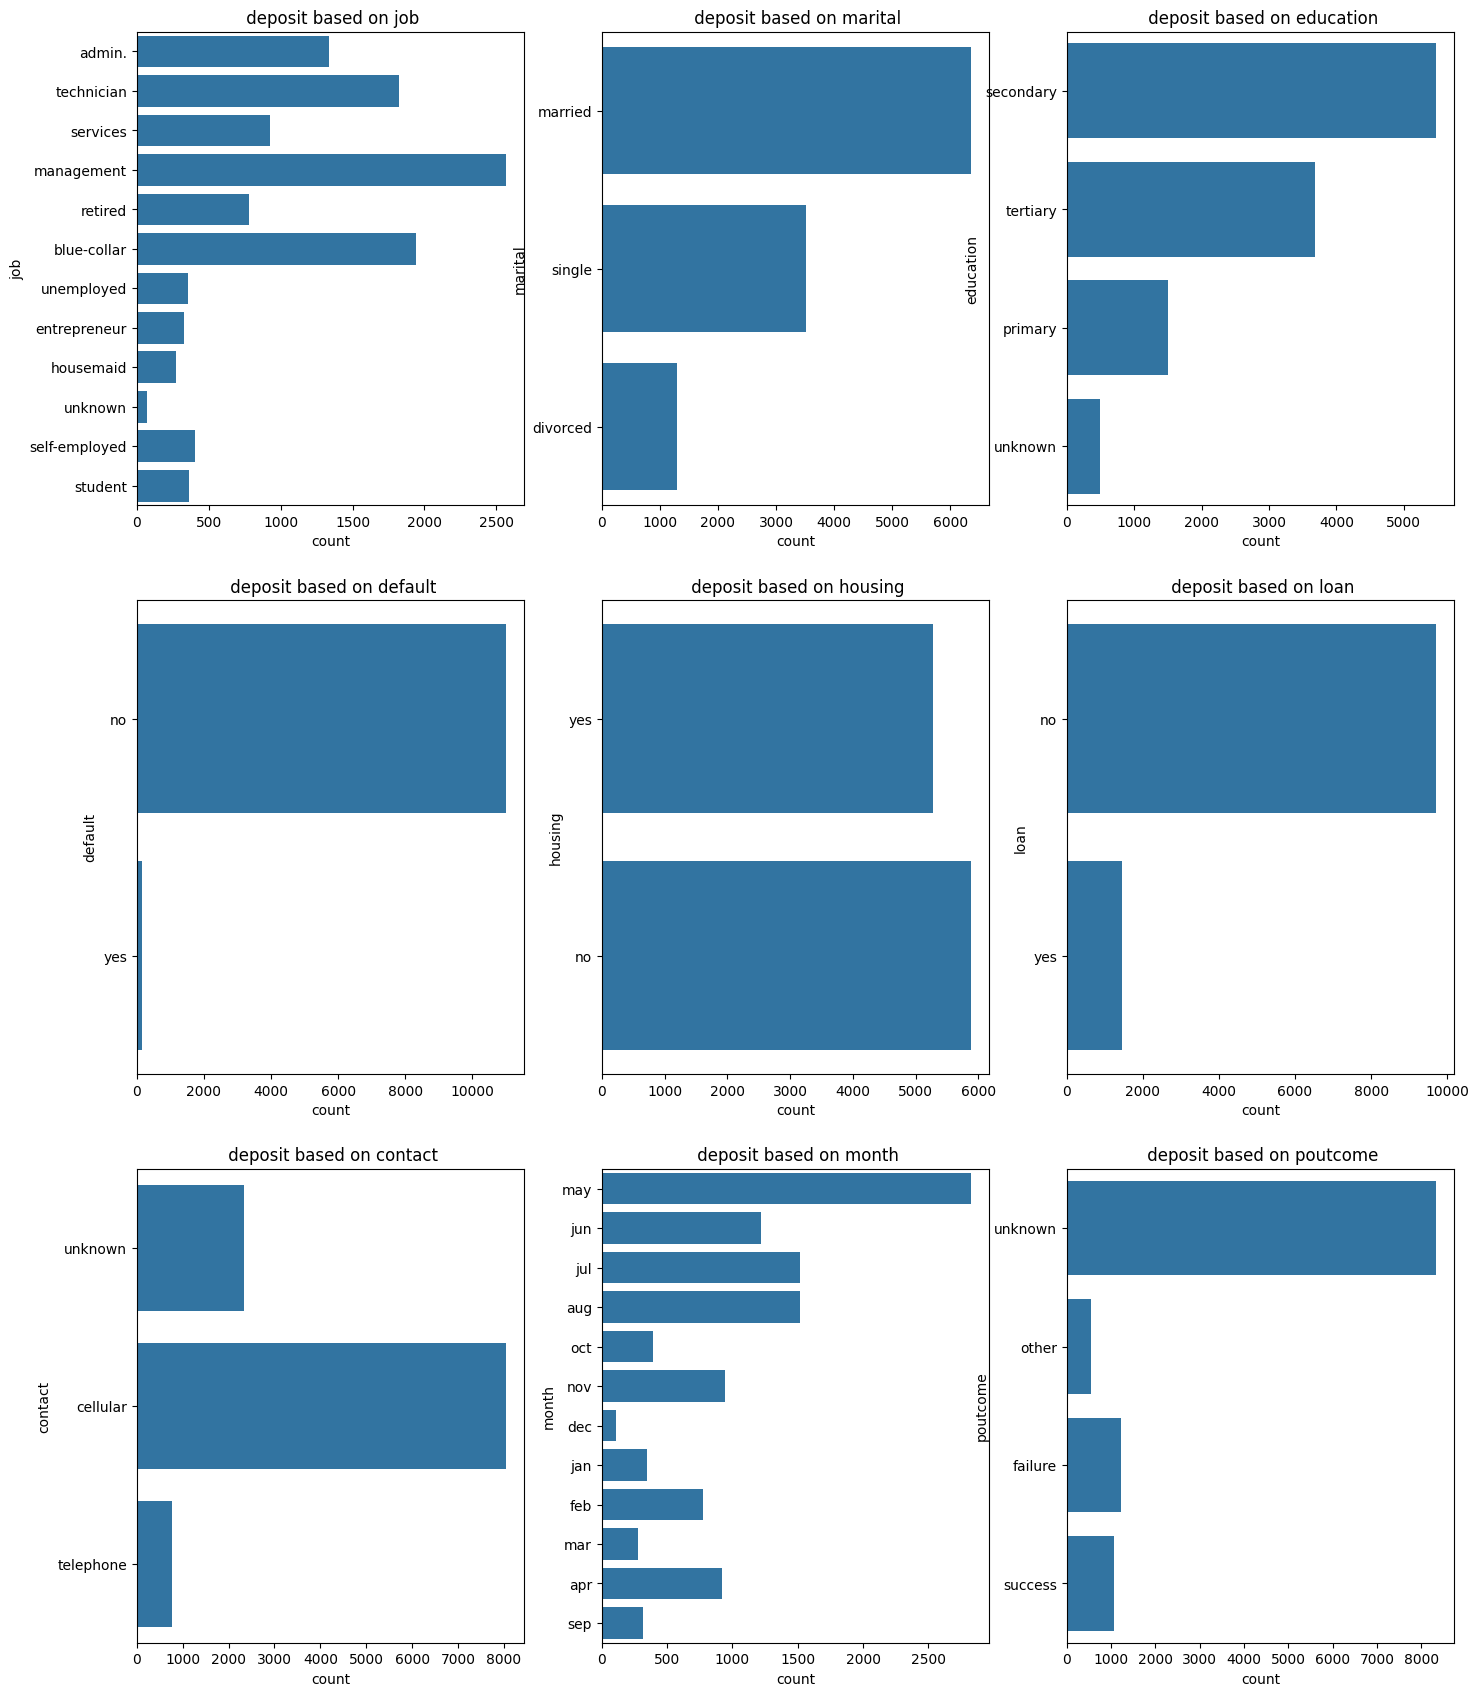

In [ ]:
#distributin of the categorical variable
plt.figure(figsize=(17,80),facecolor='white')
pltnumber=1
for i in cat_feature:
  ax=plt.subplot(11,3,pltnumber)
  sns.countplot(y = i , data = df)
  plt.title(" deposit based on {}".format(i))
  pltnumber+=1
plt.show()

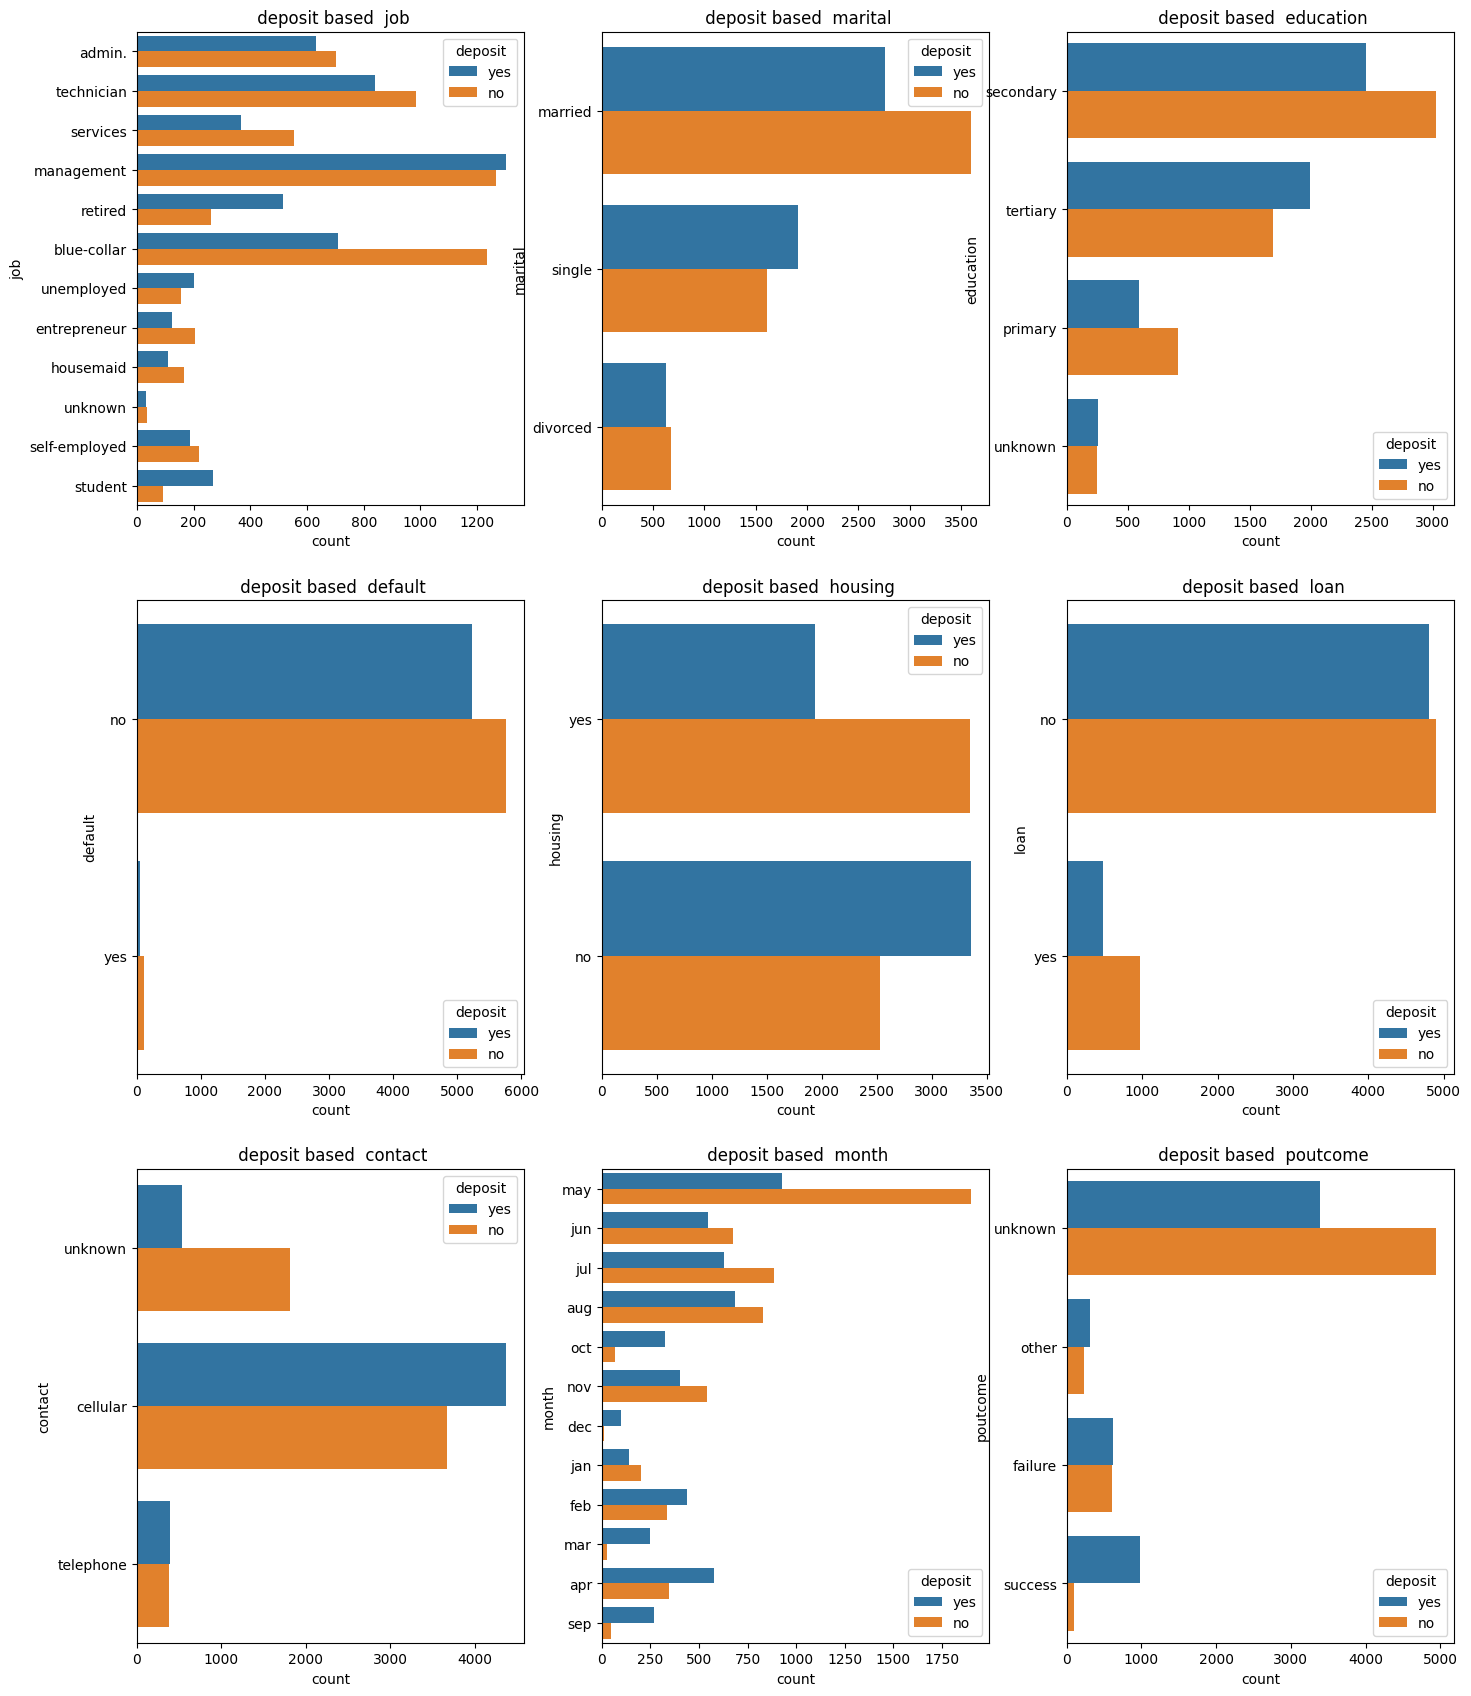

In [ ]:
# relation between the categorical varable and he target varriable

plt.figure(figsize=(17,80),facecolor='white')
pltnumber=1
for i in cat_feature:
  ax=plt.subplot(11,3,pltnumber)
  sns.countplot(y = i , hue='deposit' , data = df )
  plt.title(" deposit based  {}".format(i))
  pltnumber+=1
plt.show()

In [ ]:
for i in cat_feature:
  print(df.groupby(['deposit',i]).size())

deposit  job          
no       admin.            703
         blue-collar      1236
         entrepreneur      205
         housemaid         165
         management       1265
         retired           262
         self-employed     218
         services          554
         student            91
         technician        983
         unemployed        155
         unknown            36
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     671
         married     3596
         single      1606
yes      divorced     622
         married     2755
         single      1912
dtype: int64
deposit  education
no       prima

In [ ]:
#Exploring the numerical features

for i in df.columns:
  if df[i].dtype != 'O':
    print(i , len(df[i].unique()))
    print(df[i].unique())

num_feature = [i for i in df.columns if df[i].dtype != 'O']

age 76
[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
balance 3805
[2343   45 1270 ... 1594 2593 -134]
day 31
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]
duration 1428
[1042 1467 1389 ... 1504  818 1812]
campaign 36
[ 1  2  3  4  6  5  8 11  9 10 15 12 14  7 24 13 17 29 21 20 16 32 19 25
 22 43 18 41 63 27 30 26 23 28 33 31]
pdays 472
[ -1 166  91 147 170 150 171 126 182 110 198 174 175  27 128 100 177 167
 122 183 195 133 178  34  10 163 184 154  99  93   2 242 272  76 160  90
 196 246 238 203 268 189 267  92   9  88  85 210 257 261 270 106 199 112
  41 294 231 239 302 135 307 222 138 323 141 320 264 316 315 256 146 328
  74 148 327 341 145 266 234 345 318 325 274 343 260 305 344 254 180 340
  82 181 278 153   4 349 334 176  87 269  86 169  83  79   6

In [ ]:
df[num_feature].head()

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


<ipython-input-17-489bfbcfad2c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-17-489bfbcfad2c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-17-489bfbcfad2c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.

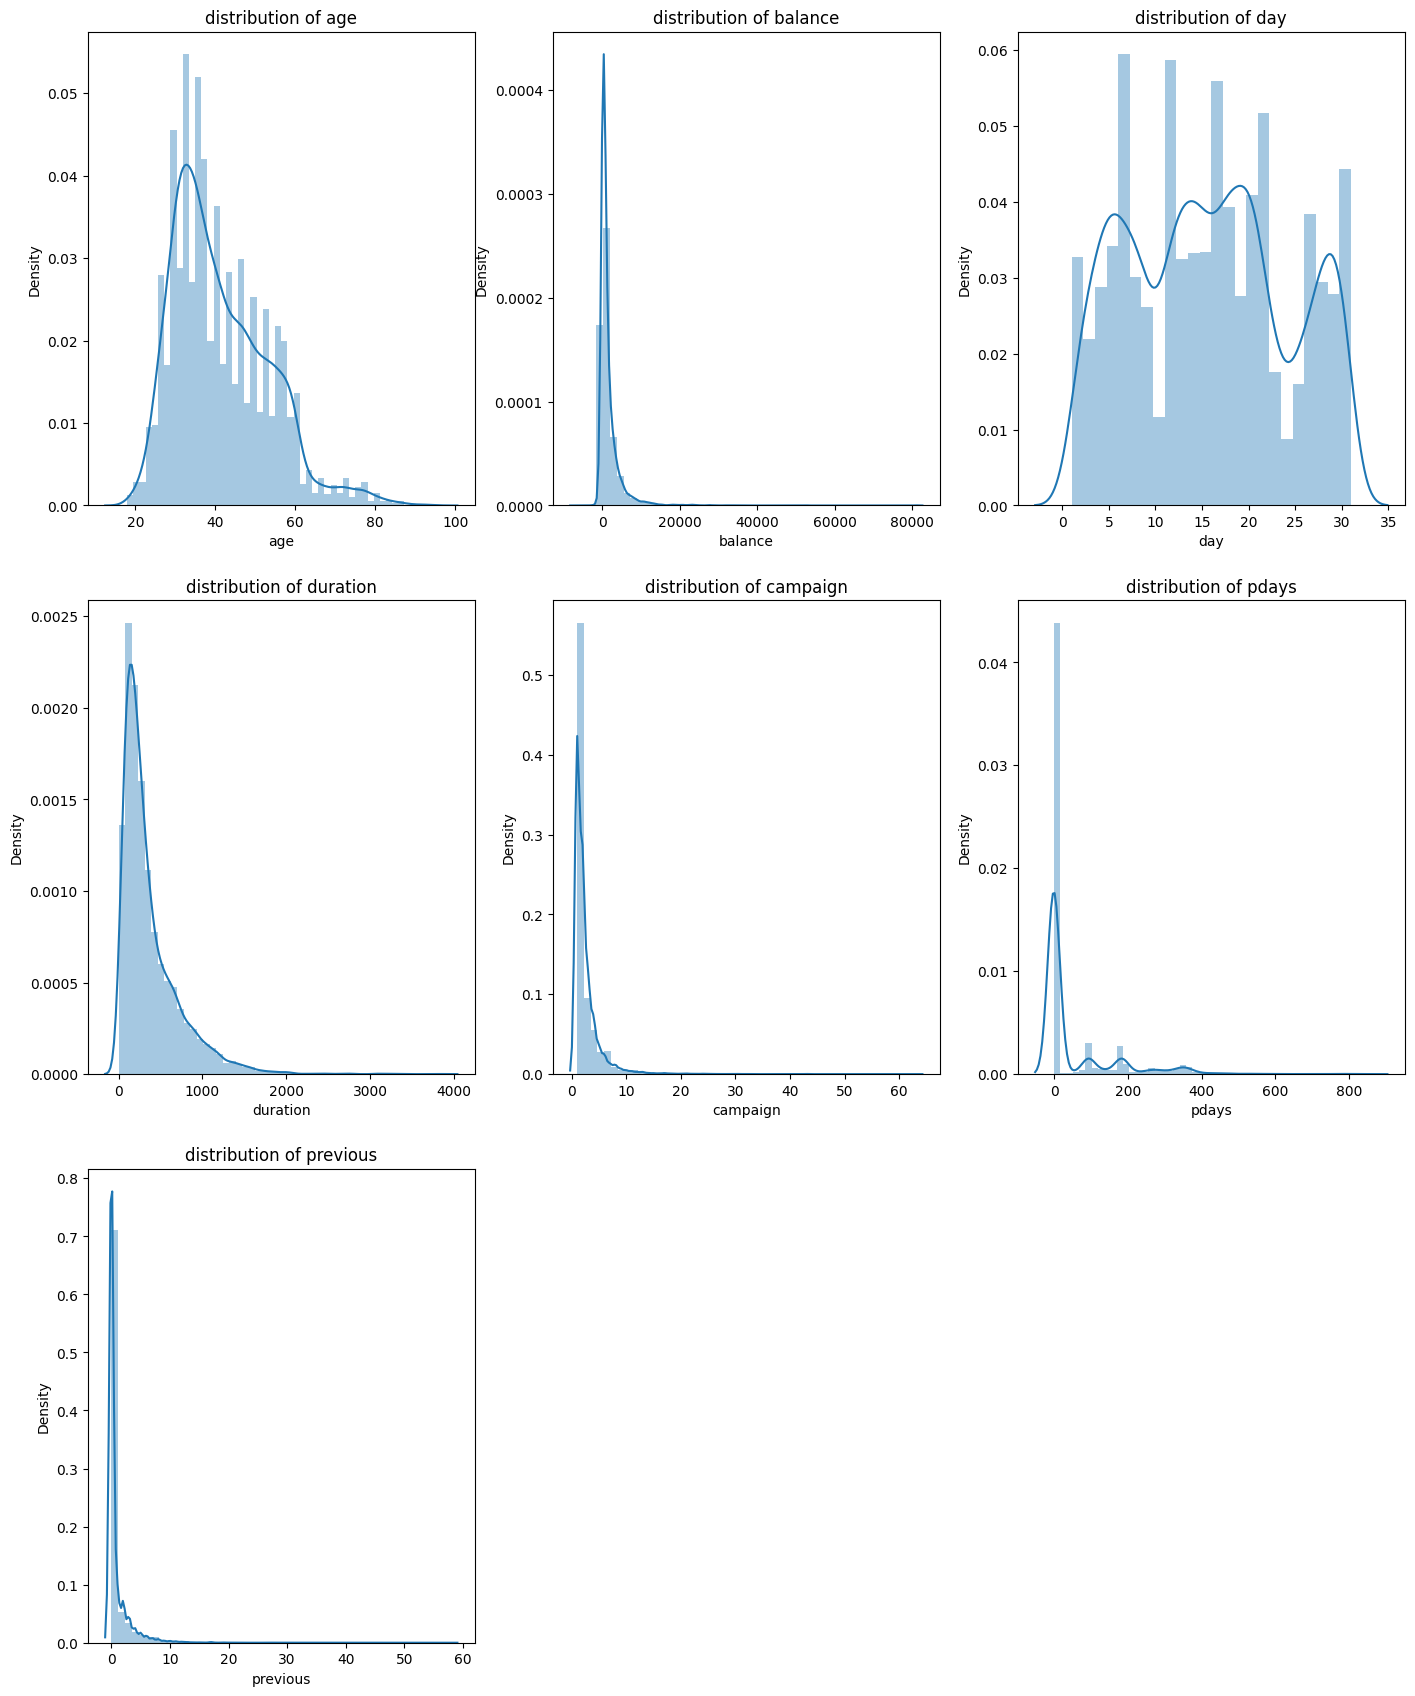

In [ ]:
#plotting the numerical variables on histogram to discreminate the continous and discrete variables
plt.figure(figsize=(17,80))
pltnum=1
for i in num_feature:
  ax=plt.subplot(11,3,pltnum)
  sns.distplot(df[i])
  plt.title("distribution of {}".format(i))
  pltnum+=1
plt.show()

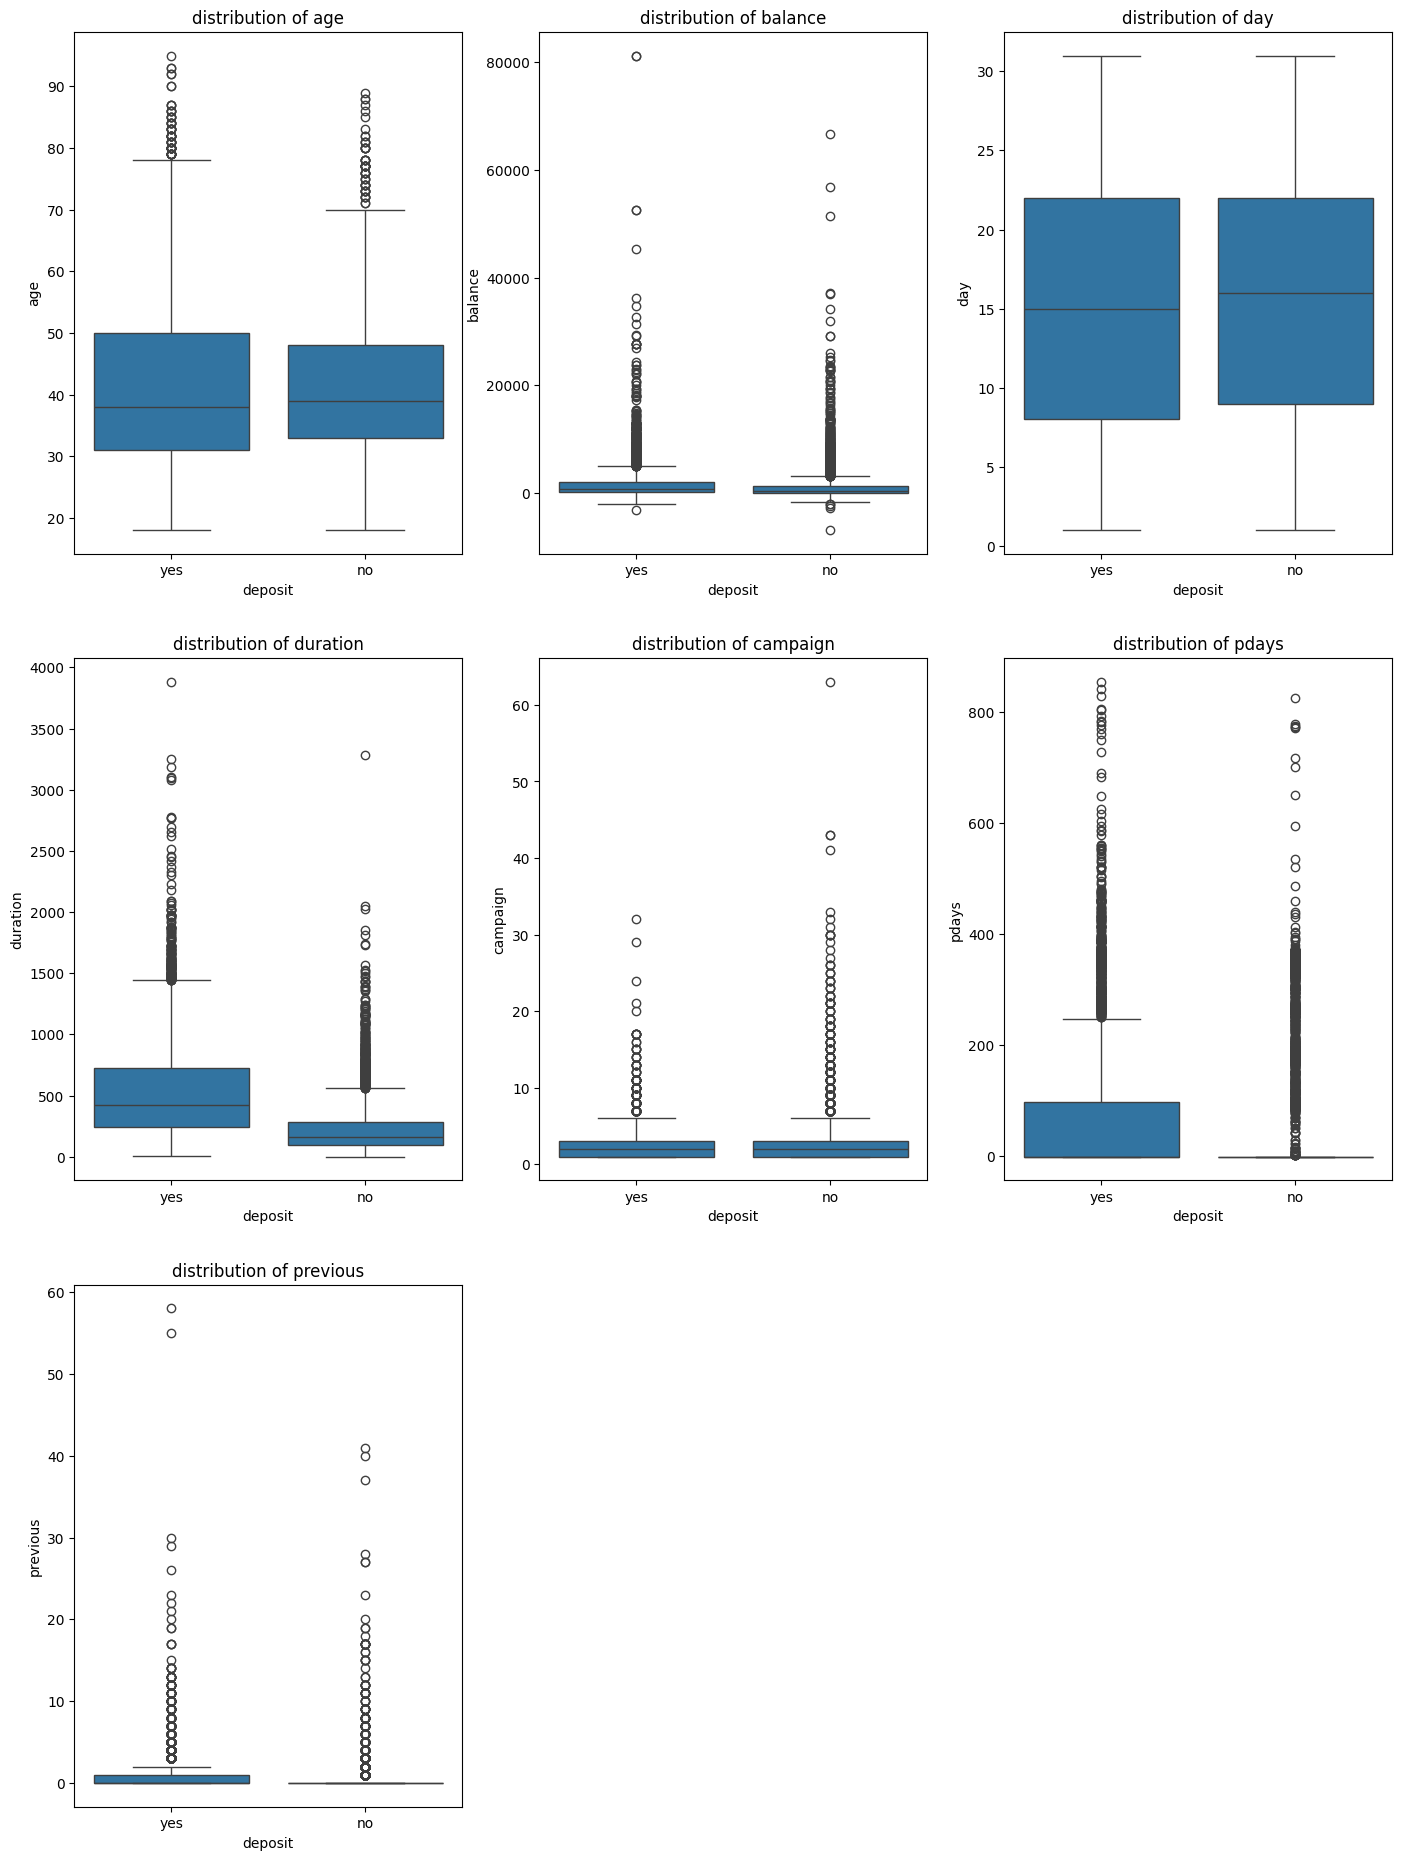

In [ ]:
plt.figure(figsize=(17,80))
pltnum=1
for i in num_feature:
  ax = plt.subplot(10,3,pltnum)
  sns.boxplot(x='deposit',y=df[i] , data=df)
  plt.title("distribution of {}".format(i))
  pltnum+=1
plt.show()

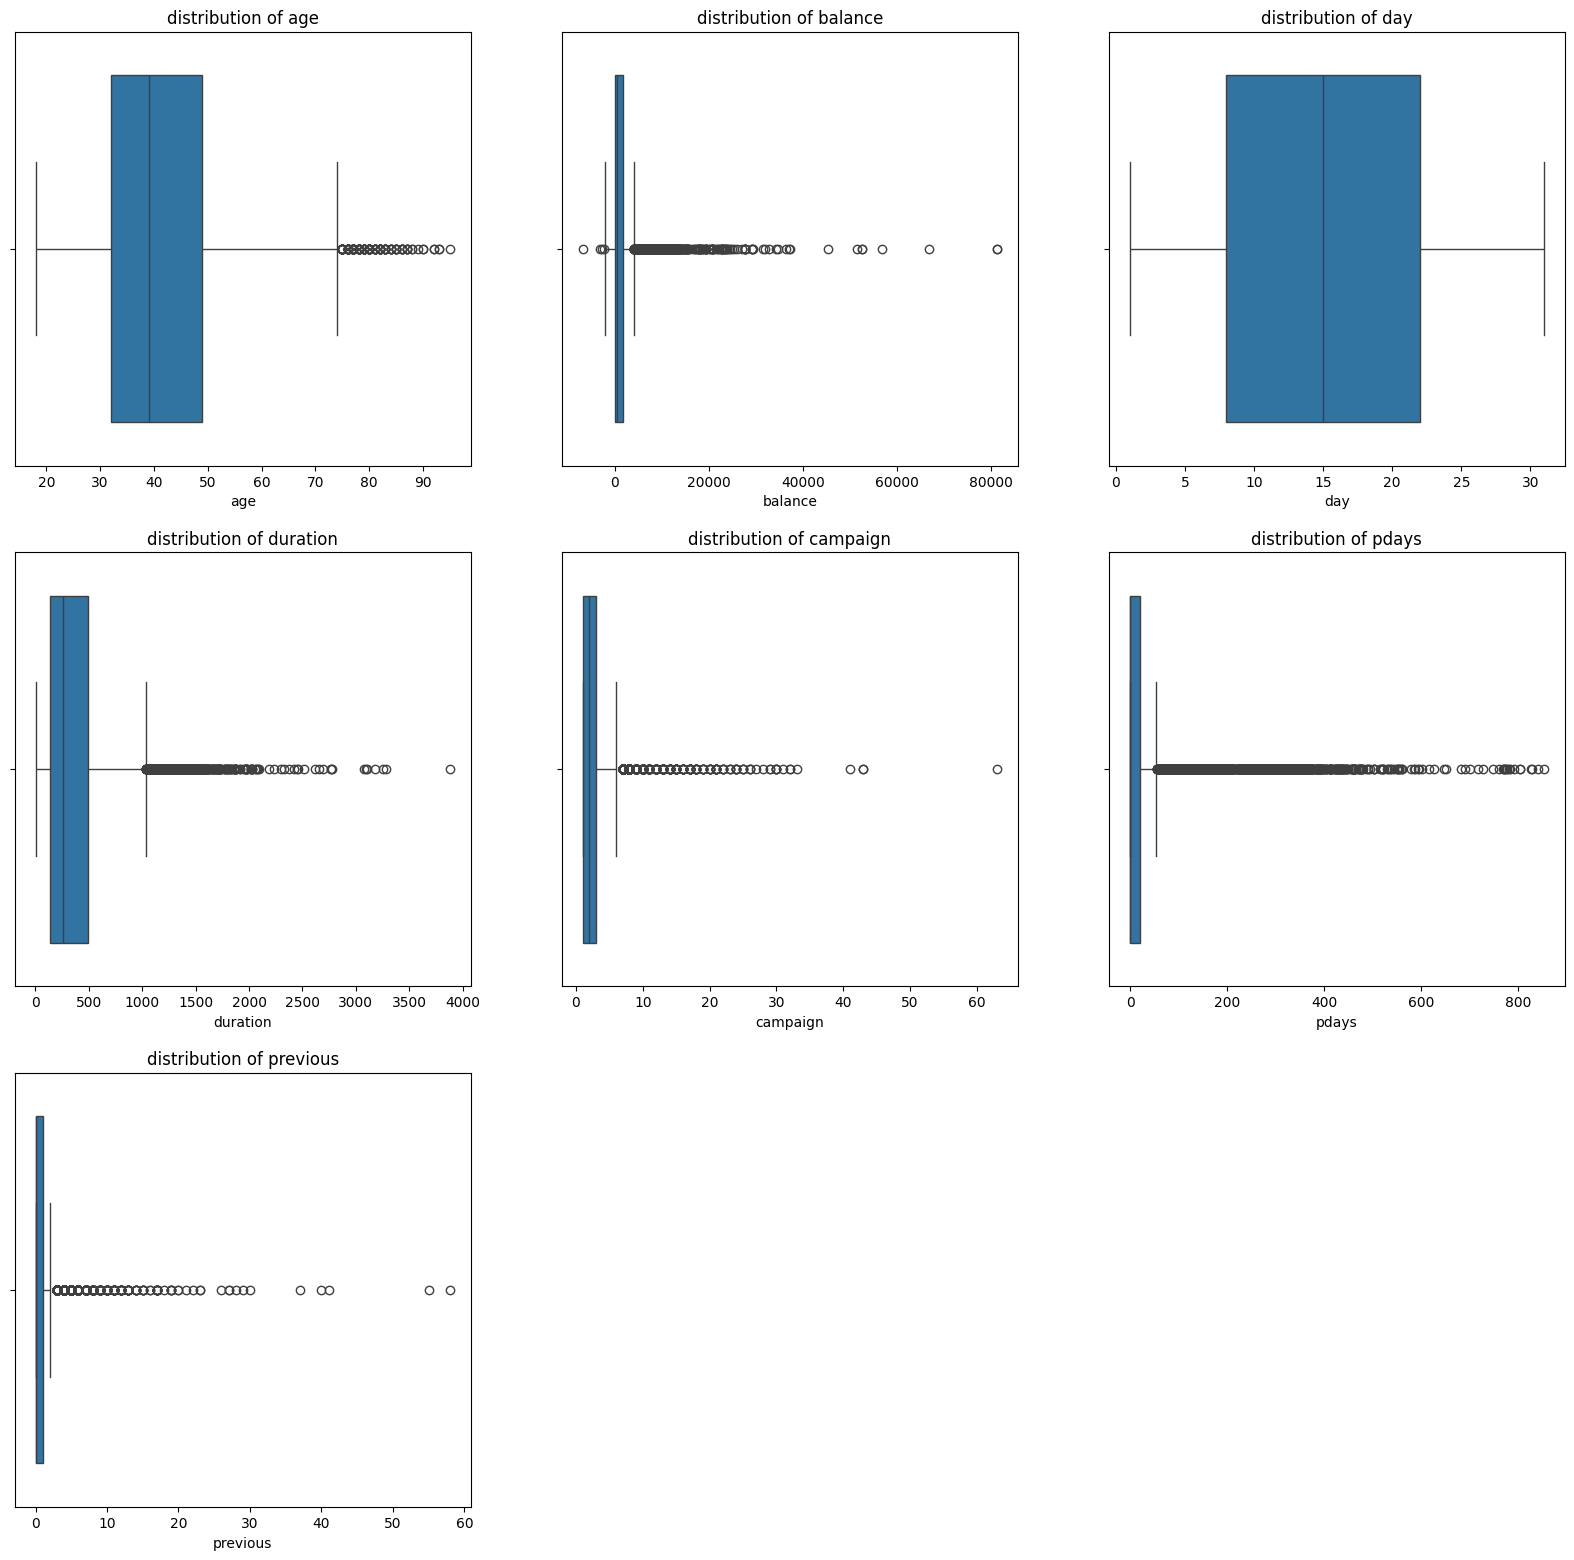

In [ ]:
#Identifting the outliers in the numerical features

plt.figure(figsize=(20,80))
pltnum=1
for i in num_feature:
  ax = plt.subplot(12,3,pltnum)
  sns.boxplot(x=df[i])
  plt.title("distribution of {}".format(i))
  pltnum+=1
plt.show()


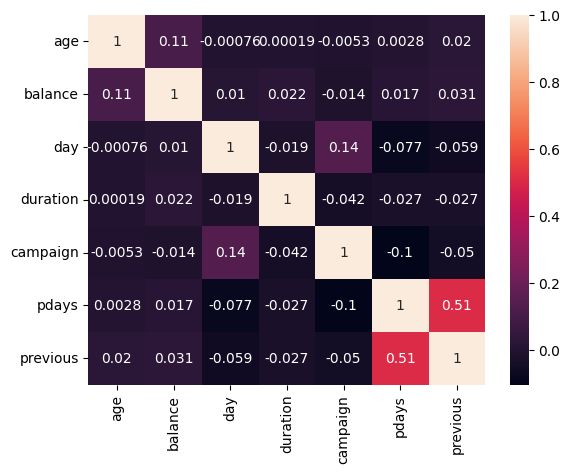

In [ ]:
# plotttign the heatmap of the correlation of the numerical data
corr = df[num_feature].corr()
sns.heatmap(corr,annot=True)
plt.show()

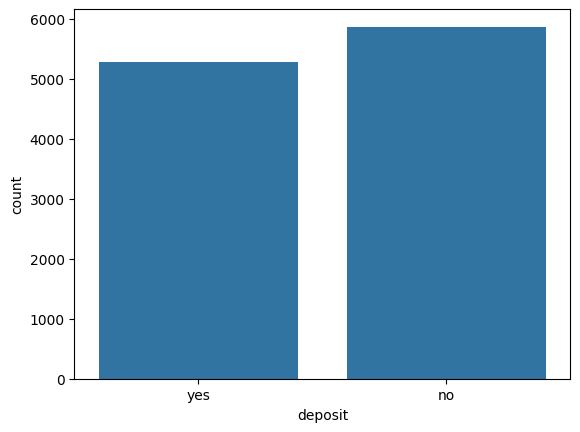

In [ ]:
#Checking if the dataset is balanced to the target value or not

sns.countplot(x=df.deposit)
plt.show()

In [ ]:
df.groupby(['deposit','default']).size()

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

In [ ]:
df.groupby(['deposit','pdays']).size()

deposit  pdays
no       -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64

In [ ]:
df.groupby(['deposit','balance']).size()

deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Length: 5082, dtype: int64

In [ ]:
df.groupby(['deposit','campaign']).size()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2561
         2           1401
         3            618
         4            317
         5            139
         6             92
         7             47
         8             32
         9             21
         10            14
         11            16
         12             4
         13             6
         14             4
         15             4
         16             2
         17             6
         20             1
         21             1
         24             1
         29             1
         32             1
dtype: int64

In [ ]:
#choosing the features

df1 = df.copy()

In [ ]:
df1.drop(['default'],inplace=True,axis=1)

In [ ]:
df1.drop(['pdays'],inplace=True,axis=1)

In [ ]:
  df1.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'previous',
       'poutcome', 'deposit'],
      dtype='object')

## **Handeling CatVariables,BoolVariables**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
category_columns = ['job','marital','education','contact','month','poutcome']

labelencoder = {}

for col in category_columns:
  labelencoder[col] = LabelEncoder()
  df1[col] = labelencoder[col].fit_transform(df1[col])


df1

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,0,1,1,2343,yes,no,2,5,8,1042,1,0,3,yes
1,56,0,1,1,45,no,no,2,5,8,1467,1,0,3,yes
2,41,9,1,1,1270,yes,no,2,5,8,1389,1,0,3,yes
3,55,7,1,1,2476,yes,no,2,5,8,579,1,0,3,yes
4,54,0,1,2,184,no,no,2,5,8,673,2,0,3,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,1,yes,no,0,20,0,257,1,0,3,no
11158,39,7,1,1,733,no,no,2,16,6,83,4,0,3,no
11159,32,9,2,1,29,no,no,0,19,1,156,2,0,3,no
11160,43,9,1,1,0,no,yes,0,8,8,9,2,5,0,no


In [ ]:
bool_columns = ['housing', 'loan','deposit']

for col in bool_columns:
  df1[col] = df1[col].map({'yes':1,'no':0})

df1

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,0,1,1,2343,1,0,2,5,8,1042,1,0,3,1
1,56,0,1,1,45,0,0,2,5,8,1467,1,0,3,1
2,41,9,1,1,1270,1,0,2,5,8,1389,1,0,3,1
3,55,7,1,1,2476,1,0,2,5,8,579,1,0,3,1
4,54,0,1,2,184,0,0,2,5,8,673,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,1,1,0,0,20,0,257,1,0,3,0
11158,39,7,1,1,733,0,0,2,16,6,83,4,0,3,0
11159,32,9,2,1,29,0,0,0,19,1,156,2,0,3,0
11160,43,9,1,1,0,0,1,0,8,8,9,2,5,0,0


In [ ]:
df2 = df1.copy()

In [ ]:
df2

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,0,1,1,2343,1,0,2,5,8,1042,1,0,3,1
1,56,0,1,1,45,0,0,2,5,8,1467,1,0,3,1
2,41,9,1,1,1270,1,0,2,5,8,1389,1,0,3,1
3,55,7,1,1,2476,1,0,2,5,8,579,1,0,3,1
4,54,0,1,2,184,0,0,2,5,8,673,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,1,1,0,0,20,0,257,1,0,3,0
11158,39,7,1,1,733,0,0,2,16,6,83,4,0,3,0
11159,32,9,2,1,29,0,0,0,19,1,156,2,0,3,0
11160,43,9,1,1,0,0,1,0,8,8,9,2,5,0,0


## **Scaling The Dataset and Splitting the Dataset**

In [ ]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = df2.drop(['deposit'],axis=1)
y = df2['deposit']

X = scalar.fit_transform(X)


## **MOdel Training and Evaluation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model.fit(X_train,y_train)

y_predict = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

print(accuracy_score(y_test,y_predict))

0.7881773399014779


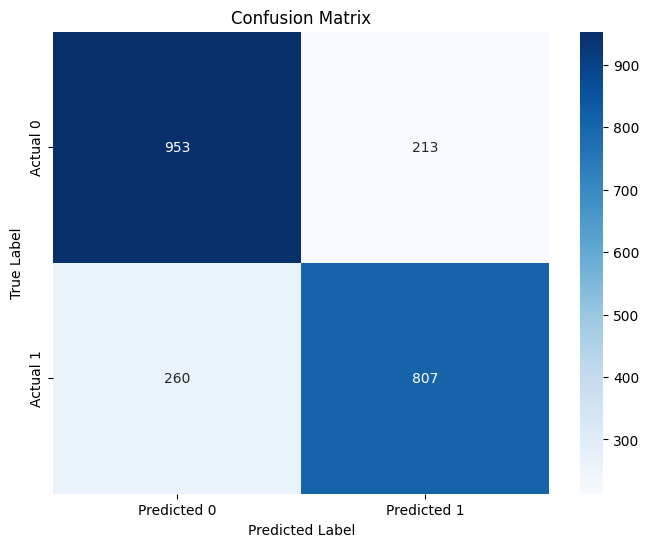

In [ ]:

cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
tree_model = DecisionTreeClassifier()

tree_model.fit(X_train,y_train)

tree_predict = tree_model.predict(X_test)

print(accuracy_score(y_test,tree_predict))



0.7747424988804299


## **Applying Hyperparameter**

In [ ]:
param_grid = {
    'max_depth': [10,20,30],
    'min_samples_split': [10,11,12,13],
    'criterion': ['gini', 'entropy']
}

grid_tree = GridSearchCV(estimator=tree_model,param_grid=param_grid,cv=5)

grid_tree.fit(X_train,y_train)

grid_predict = grid_tree.predict(X_test)

print(accuracy_score(y_test,grid_predict))

0.8114643976712942


In [ ]:
grid_tree.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 12}

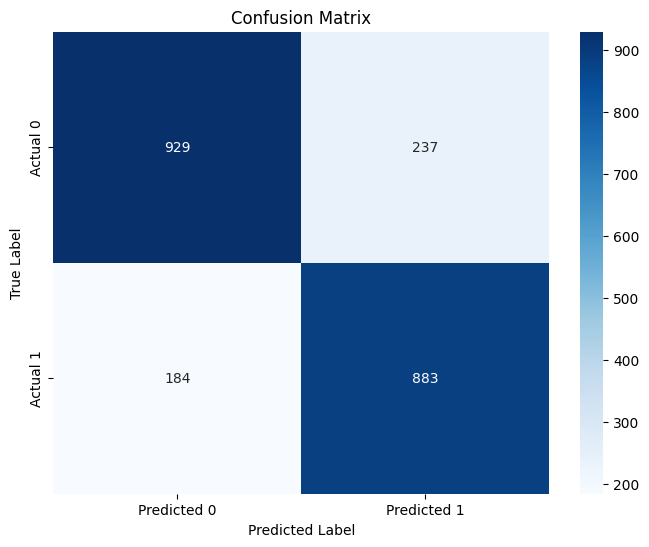

In [ ]:
cm = confusion_matrix(y_test, grid_predict)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()